In [1]:
from time_series import TimeSeries

## The Data

The data being used for this time series is the enrollment for Saint Louis Public Schools and it comes from the Missouri Department of Elementary and Secondary Education (DESE). It has been cleaned slightly to just include data from STL Public Schools looking at year by year enrollment since the year 2000. Over the past couple decades enrollment in Saint Louis Public schools has dropped by alot (faster than the school aged child population). Having worked in SLPS I'm interested in modeling the further decline of the enrollment and discovering more about what has caused this decline.

In [2]:
stl_data = TimeSeries("stl_public_school_enrollment.csv", True, (0,1), data_label="SLPS Enrollment")

stl_data.data

array([[ 2000., 44264.],
       [ 2001., 41988.],
       [ 2002., 40868.],
       [ 2003., 39916.],
       [ 2004., 38374.],
       [ 2005., 36045.],
       [ 2006., 35361.],
       [ 2007., 32135.],
       [ 2008., 27574.],
       [ 2009., 26108.],
       [ 2010., 25046.],
       [ 2011., 23576.],
       [ 2012., 22516.],
       [ 2013., 25200.],
       [ 2014., 24869.],
       [ 2015., 24154.],
       [ 2016., 22506.],
       [ 2017., 21754.],
       [ 2018., 20879.],
       [ 2019., 19771.],
       [ 2020., 19222.],
       [ 2021., 18632.]])

## 1.1 Ploting the Time Series Data

You can see below the time series ploted as a scatter plot. As expected the trend for the data is a descrease in enrollment over time.

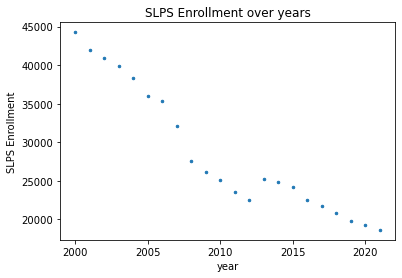

In [3]:
stl_data.plot()

## 1.2 Calculate and Plot the moving average

Here I'm plotting the moving average with m = 7: 

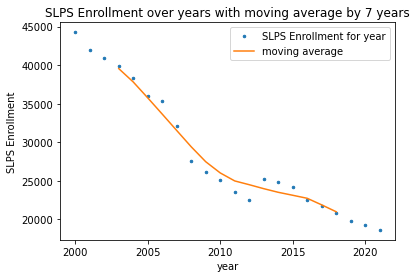

In [4]:
stl_data.plot_moving_average(7)

Obviously the moving average also trends downward. It looks pretty linear but you can see it levels off for a couple years around 2012 when there was an uptick in enrollment. I actually have some context for this, that year a major system of charter schools in Saint Louis closed and the students were transferred to SLPS schools causing a bump in enrollment for a while, but by 2018 the enrollment dropped back below that level and the moving average continued to move downward over that time.

Here are the moving averages ploted with m = 5 and m = 9 

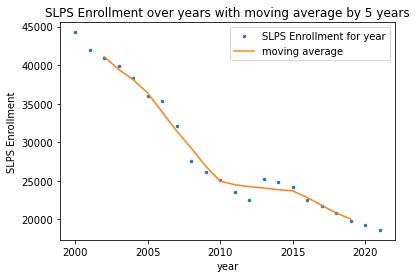

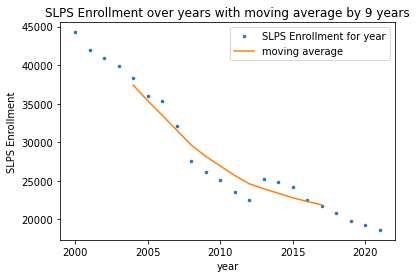

In [5]:
stl_data.plot_moving_average(5)
stl_data.plot_moving_average(9)

Plotting with a smaller m causes the moving average to be more sensitive to flucutations in individual years (thus it looks more similar to the individual data points in the time series), increasing the m causes the line to be even smoother.

## 1.3.1 Fitting the moving average to a linear model (without a y intercept)

From the outset I could tell that this would not go well since enrollment is decreasing (and starting at a higher value). Below is the model plotted against the moving average (m = 7) along with the beta value and r value.

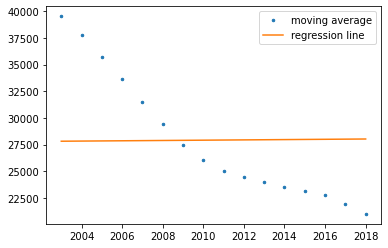

{'r': 547247549.6911995, 'b0': 0, 'b1': 13.885556506069696}

In [7]:
stl_data.linear_regression(7, False)

Clearly the line does not fit well and the R value is quite large.

## 1.3.2 Fitting the moving average to a linear model (with a y intercept)

Here is a second model utilizing a y interceot again plotted against the moving average (m = 7).

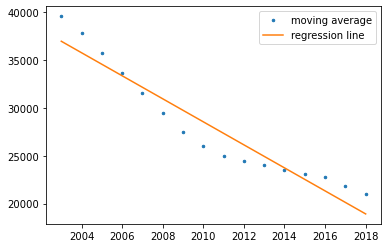

{'r': 45587130.83621559, 'b0': 2442140.6842438267, 'b1': -1200.8012605042652}

In [8]:
stl_data.linear_regression(7, True)

## 1.4 Picking a winner

The second model's residuals are much lower and, well, that line looks a lot closer to the truth.

## 1.5 Predicting future points

Here are some future predictions using the years 2019 (yn in the moving average), 2022 (next year), and 2029 (yn + 10) with the two models.

In [10]:
model1_2022 = stl_data.predict_point_n(7, False, 2022)
model2_2022 = stl_data.predict_point_n(7, True, 2022)
model1_2032 = stl_data.predict_point_n(7, False, 2032)
model2_2032 = stl_data.predict_point_n(7, True, 2032)
print(f"Model 1 2022: {model1_2022}\nModel 1 2032: {model1_2032}")
print(f"Model 2 2022: {model2_2022}\nModel 2 2032: {model2_2032}")

Model 1 2022: 28076.595255272925
Model 1 2032: 28215.450820333623
Model 2 2022: 14120.535504202358
Model 2 2032: 2112.522899159696


Again model 1 does not do well, the number is higher that the actual moving average is in 2018 (so it doesn't follow the trend) and continues to inrease for each future n. Model 2 does much better, I would bet that 2019 and 2022 are pretty accurate but one wonders if the decrease will level off as it gets further into the future. It's possible that a linear model isn't the best way to model this decrease.